In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [2]:
info_df = pd.read_csv('data/df_info_selected_subjects_table.csv')
embeddings_df = pd.read_csv('data/encoder_embeddings.csv')

In [3]:
info_selected = info_df[['id', 'sex', 'age', 'height', 'weight', 'bmi']]

In [4]:
embeddings_df['id'] = range(31, 41)
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,id
0,-35.833740,-54.827843,-62.428364,-54.221745,-60.935585,59.086338,59.767273,67.611565,-35.404552,-54.929703,...,90.950960,-57.174280,-88.120300,-99.108630,-87.190346,-97.815040,95.335930,95.229660,107.682440,31
1,-26.224749,-39.533180,-44.683346,-39.149094,-43.682693,42.430428,42.517048,48.257107,-133.222430,-215.846900,...,287.270800,-139.384610,-218.891170,-247.856310,-216.039960,-236.670700,230.633160,233.024600,267.918800,32
2,-92.036880,-142.936950,-160.777510,-141.525220,-153.698320,151.465420,152.434740,172.878050,-115.377090,-178.003860,...,77.567400,-38.417088,-59.119907,-67.239340,-58.337494,-65.154460,63.440193,63.740578,72.079735,33
3,-44.560734,-68.871510,-77.896300,-67.803610,-75.990580,73.749400,74.231550,84.159615,-74.192940,-117.606705,...,86.788530,-46.535088,-71.870340,-81.079210,-70.703790,-79.112240,76.845860,77.126780,87.176440,34
4,-270.773700,-407.454500,-468.322140,-411.587920,-452.353600,438.133800,443.286900,510.885620,-123.863174,-191.835420,...,129.100370,-64.444140,-99.274560,-112.236015,-97.845740,-109.437830,106.360470,106.680336,120.642830,35
5,-337.697330,-511.661960,-580.861800,-508.434630,-540.623900,534.084100,545.108340,605.501500,-69.943410,-107.954994,...,89.606860,-49.920742,-77.025720,-87.067444,-75.808300,-84.976460,82.535255,82.830670,93.604256,36
6,-52.001583,-77.467860,-88.447850,-77.221405,-86.533325,83.992100,84.002760,95.879250,-76.884270,-111.509445,...,72.520130,-53.934177,-83.561030,-94.401040,-82.241196,-92.158130,89.479614,89.852340,101.199715,37
7,-25.552921,-39.461040,-44.575720,-38.790480,-43.477177,42.228294,42.279663,48.207043,-35.136112,-55.367400,...,131.624740,-30.656809,-47.309734,-53.336514,-46.534153,-52.122147,50.603508,50.758965,57.458015,38
8,-610.131960,-941.263200,-1048.486600,-939.634030,-1017.419800,987.934600,999.877000,1138.520500,-500.297940,-781.567500,...,72.349976,-338.062200,-529.007700,-592.085800,-520.780300,-570.656300,561.139400,567.358030,625.488830,39
9,-199.822340,-305.436340,-346.858800,-306.600900,-335.889400,330.253880,331.094000,381.360200,-39.577040,-60.893610,...,75.630840,-39.527283,-61.144436,-68.941170,-60.049310,-67.222200,65.254370,65.548100,74.105600,40


In [5]:
merged_df = pd.merge(embeddings_df, info_selected, on='id')

In [6]:
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
embeddings_2d = tsne.fit_transform(merged_df.drop(columns=['id', 'sex', 'age', 'height', 'weight', 'bmi']))

In [7]:
embeddings_2d_df = pd.DataFrame(embeddings_2d, columns=['TSNE1', 'TSNE2'])

In [8]:
embeddings_2d_df[['id', 'sex', 'age', 'height', 'weight', 'bmi']] = merged_df[['id', 'sex', 'age', 'height', 'weight', 'bmi']]

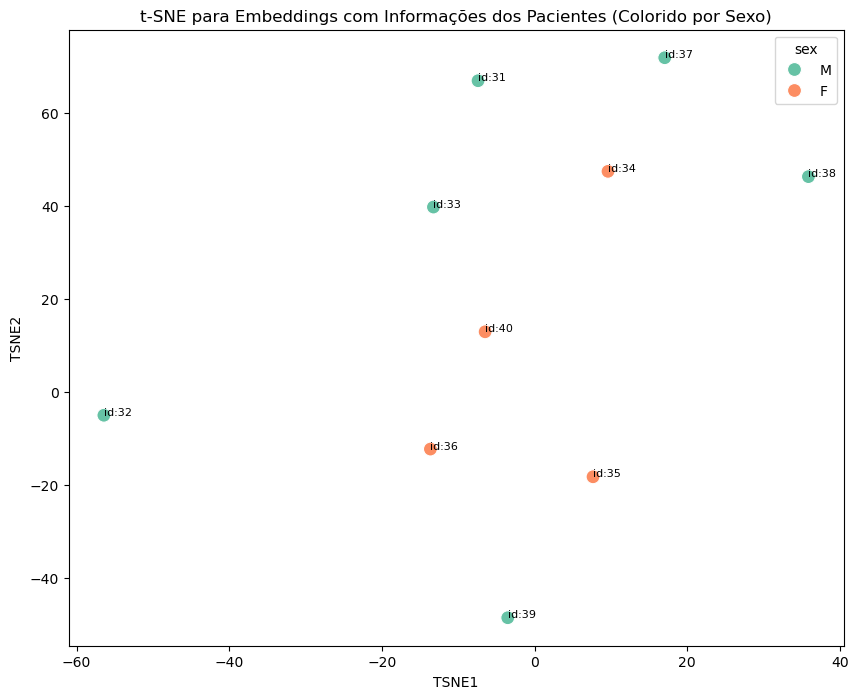

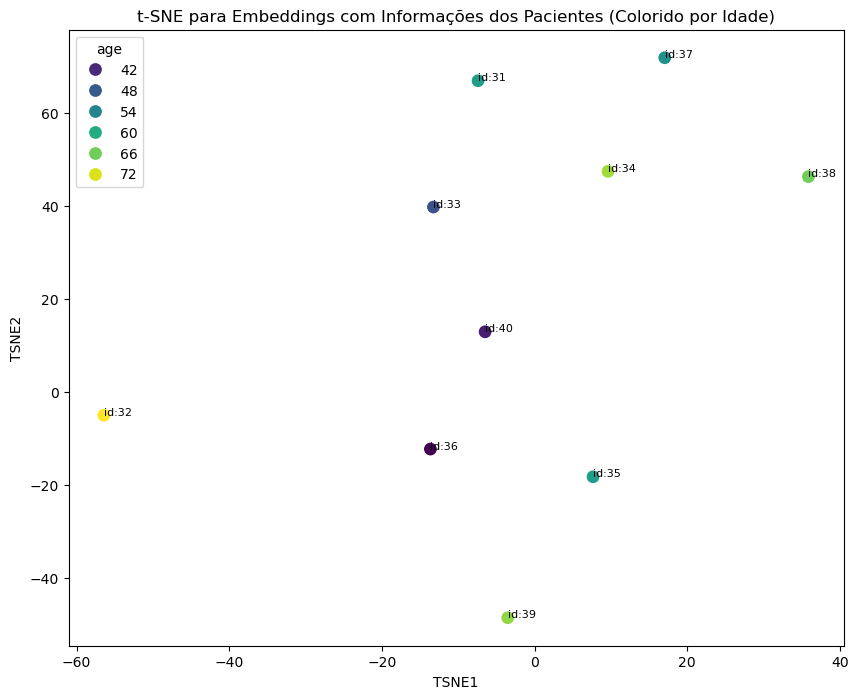

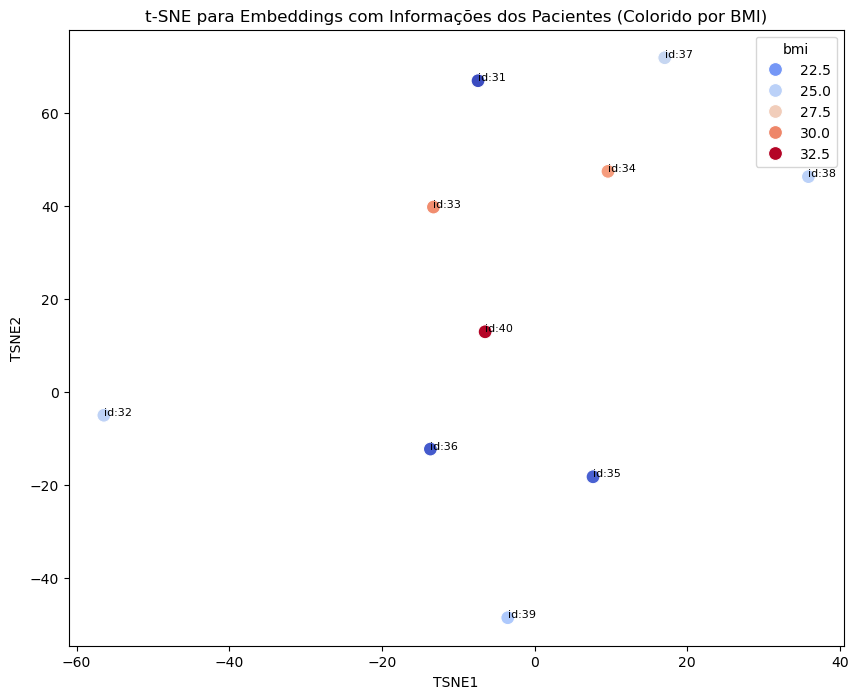

In [9]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='sex', data=embeddings_2d_df, palette='Set2', s=100)
for i in range(len(embeddings_2d_df)):
    plt.text(embeddings_2d_df['TSNE1'][i], embeddings_2d_df['TSNE2'][i], f'id:{embeddings_2d_df["id"][i]}', fontsize=8)
plt.title('t-SNE para Embeddings com Informações dos Pacientes (Colorido por Sexo)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='age', data=embeddings_2d_df, palette='viridis', s=100)
for i in range(len(embeddings_2d_df)):
    plt.text(embeddings_2d_df['TSNE1'][i], embeddings_2d_df['TSNE2'][i], f'id:{embeddings_2d_df["id"][i]}', fontsize=8)
plt.title('t-SNE para Embeddings com Informações dos Pacientes (Colorido por Idade)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='bmi', data=embeddings_2d_df, palette='coolwarm', s=100)
for i in range(len(embeddings_2d_df)):
    plt.text(embeddings_2d_df['TSNE1'][i], embeddings_2d_df['TSNE2'][i], f'id:{embeddings_2d_df["id"][i]}', fontsize=8)
plt.title('t-SNE para Embeddings com Informações dos Pacientes (Colorido por BMI)')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()
